In [ ]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [ ]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data.head()

In [ ]:
fish_target = df.loc[cond, ['Species']]
fish_target.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

In [ ]:
# print(len(train_input))
# print(len(test_input))
# print(len(train_target))
# print(len(test_target))

In [ ]:
# test_target # 잘 섞였는지 확인

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species']) # 학습

In [ ]:
kn.score(test_input, test_target['Species']) # 채점

In [ ]:
kn.predict([[25, 150]])

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^') # marker: 모양 바꾸기

In [ ]:
kn.kneighbors([[25, 150]]) # 가까이에 있는 데이터와 거리를 계산해서 보여줌

In [ ]:
mean = train_input.mean()
std = train_input.std()
print(mean)
print(std)

In [ ]:
train_scaled = (train_input - mean) / std

In [ ]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])

In [ ]:
kn.fit(train_scaled, train_target['Species'])

In [ ]:
test_scaled = (test_input - mean) / std

In [ ]:
kn.score(test_scaled, test_target['Species'])

In [ ]:
new = ([25, 150] - mean) / std
new

In [ ]:
kn.predict([new])

## Penguins

- Adelie, Gentoo 구분하기

In [1]:
import seaborn as sns

df = sns.load_dataset('Penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
sample_data = df.loc[cond, ['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [ ]:
# 결측치 제거 버전
sample_data = sample_data.dropna()

In [ ]:
# 결측치 채우기 버전
cond1 = sample_data['species'] == 'Adelie'
cond2 = sample_data['species'] == 'Gentoo'

al_mean = sample_data.loc[cond1, 'bill_length_mm'].mean()
ad_mean = sample_data.loc[cond1, 'bill_depth_mm'].mean()
af_mean = sample_data.loc[cond1, 'flipper_length_mm'].mean()
am_mean = sample_data.loc[cond1, 'body_mass_g'].mean()

gl_mean = sample_data.loc[cond2, 'bill_length_mm'].mean()
gd_mean = sample_data.loc[cond2, 'bill_depth_mm'].mean()
gf_mean = sample_data.loc[cond2, 'flipper_length_mm'].mean()
gm_mean = sample_data.loc[cond2, 'body_mass_g'].mean()

In [ ]:
sample_data.loc[cond1, 'bill_length_mm'] = sample_data.loc[cond1, 'bill_length_mm'].fillna(al_mean)
sample_data.loc[cond1, 'bill_depth_mm'] = sample_data.loc[cond1, 'bill_depth_mm'].fillna(ad_mean)
sample_data.loc[cond1, 'flipper_length_mm'] = sample_data.loc[cond1, 'flipper_length_mm'].fillna(af_mean)
sample_data.loc[cond1, 'body_mass_g'] = sample_data.loc[cond1, 'body_mass_g'].fillna(am_mean)

sample_data.loc[cond2, 'bill_length_mm'] = sample_data.loc[cond2, 'bill_length_mm'].fillna(gl_mean)
sample_data.loc[cond2, 'bill_depth_mm'] = sample_data.loc[cond2, 'bill_depth_mm'].fillna(gd_mean)
sample_data.loc[cond2, 'flipper_length_mm'] = sample_data.loc[cond2, 'flipper_length_mm'].fillna(gf_mean)
sample_data.loc[cond2, 'body_mass_g'] = sample_data.loc[cond2, 'body_mass_g'].fillna(gm_mean)

In [ ]:
# for문으로 결측치 채우기
for species in sample_data['species'].unique():
    cond = sample_data['species'] == species
    for column in sample_data.loc[cond].columns:
        if column != 'species':
            mean = sample_data.loc[cond, column].mean()
            sample_data.loc[cond, column] = sample_data.loc[cond, column].fillna(mean)

In [ ]:
sample_data.isna().sum()

In [ ]:
pen_target = sample_data.loc[cond, ['species']]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(sample_data['bill_length_mm'], sample_data['bill_depth_mm'])

In [ ]:
pen_data = sample_data.loc[cond, ['bill_length_mm', 'bill_depth_mm']]

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(pen_data, pen_target)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['species'])

In [ ]:
kn.score(test_input, test_target['species'])

In [3]:
# 선생님 코드

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
# df = df.dropna()
df.dropna(inplace=True)

In [6]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [9]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
pg_data = df.loc[cond, ['bill_depth_mm', 'body_mass_g']]
# pg_data

,bill_depth_mm,body_mass_g
0,18.7,3750.0
1,17.4,3800.0
2,18.0,3250.0
4,19.3,3450.0
5,20.6,3650.0
...,...,...
338,13.7,4925.0
340,14.3,4850.0
341,15.7,5750.0
342,14.8,5200.0


In [11]:
pg_target = df.loc[cond, ['species']]
# pg_target

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie
...,...
338,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


In [12]:
import matplotlib.pyplot as plt

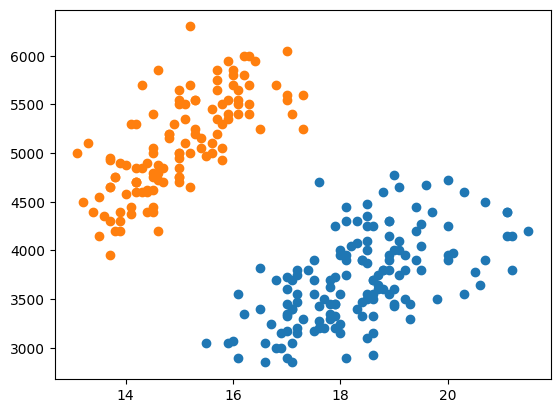

In [17]:
plt.scatter(df.loc[df['species'] == 'Adelie', ['bill_depth_mm']], df.loc[df['species'] == 'Adelie', ['body_mass_g']])
plt.scatter(df.loc[df['species'] == 'Gentoo', ['bill_depth_mm']], df.loc[df['species'] == 'Gentoo', ['body_mass_g']])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_input, test_input, train_target, test_target = train_test_split(pg_data, pg_target)

In [21]:
mean = train_input.mean()
std = train_input.std()

train_scaled = (train_input - mean) / std

In [26]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [27]:
kn.fit(train_scaled, train_target)

C:\Users\1-14\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [28]:
kn.score(test_input, test_target)

0.3880597014925373